# Pit Stop Data Analysis Notebook

In [14]:
import datetime
import re
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

import final_func as fn

In [15]:
# reload Module
import importlib
importlib.reload(fn)

<module 'final_func' from '/Users/pigggy/PycharmProjects/2022Spring_Finals 3/final_func.py'>

## Data Preparation

In [16]:
# Load data
pit = pd.read_csv('data/pit_stops.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')

In [17]:
# Process the data files
merge_df = fn.merge_data([pit, results, status])
merge_df = fn.process_data(merge_df)

## Hypothesis 1

In [18]:
df_group = fn.pit_stop_group(merge_df, by='total_stops')

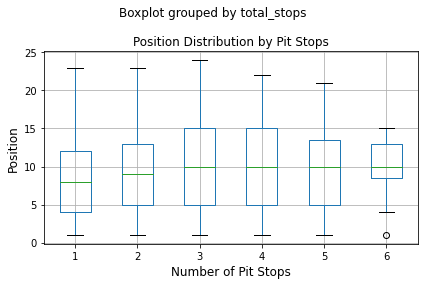

In [19]:
fn.pitstop_boxplot(df_group)

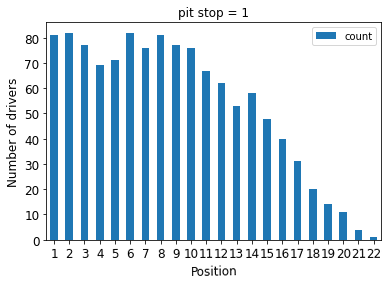

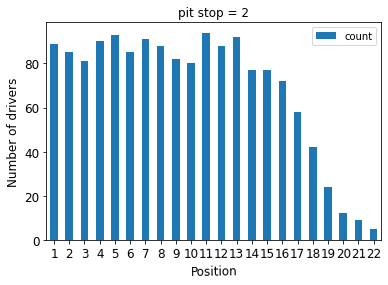

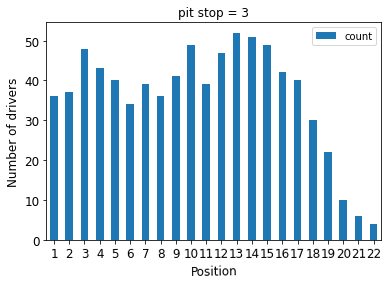

In [20]:
fn.stop_chart(df_group,3,22)

In [21]:
fn.analysis_of_variance(df_group)

H0: There is no significant difference in rank distribution between drivers taking a different number of total pit stops.
----------------------------------------------------------------------------------------
P-value between 1 pitstop and 2 pitstop is 3.63722950552198e-05
Reject H0. There is a difference.
----------------------------------------------------------------------------------------
P-value between 2 pitstop and 3 pitstop is 8.723338219301086e-05
Reject H0. There is a difference.
----------------------------------------------------------------------------------------
P-value between 3 pitstop and 1 pitstop is 2.794554101876127e-12
Reject H0. There is a difference.


## Hypothesis 2

----------------------------------------------------------------------------------------
Total Pit Stops:  1
No.  1  pit stop:  mean =  0.416  std =  0.147
    66.9% within mean ± 1 std
    95.7% within mean ± 2 std
     One sample T Test, mu=0.5, p value=2.0875934507813905e-74
     One sample Wilcoxon Signed Rank Test, mu=0.5, p value=3.796253145662607e-68


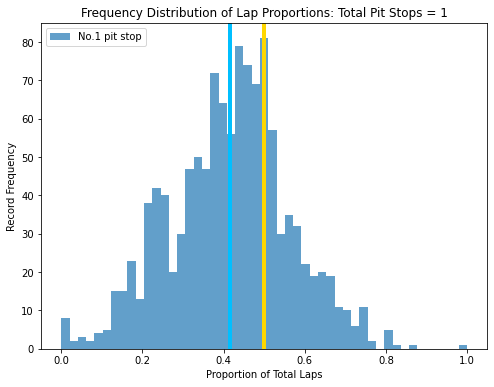

----------------------------------------------------------------------------------------
Total Pit Stops:  2
No.  1  pit stop:  mean =  0.252  std =  0.118
    71.7% within mean ± 1 std
    95.8% within mean ± 2 std
     One sample T Test, mu=0.333, p value=4.281028243470185e-129
     One sample Wilcoxon Signed Rank Test, mu=0.333, p value=3.861338109743407e-119
No.  2  pit stop:  mean =  0.62  std =  0.134
    72.9% within mean ± 1 std
    93.1% within mean ± 2 std
     One sample T Test, mu=0.667, p value=1.975143803048166e-39
     One sample Wilcoxon Signed Rank Test, mu=0.667, p value=1.8738849390663688e-42


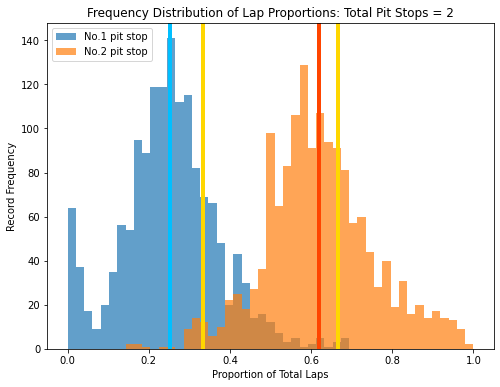

----------------------------------------------------------------------------------------
Total Pit Stops:  3
No.  1  pit stop:  mean =  0.174  std =  0.098
    66.6% within mean ± 1 std
    97.5% within mean ± 2 std
     One sample T Test, mu=0.25, p value=9.555486349403269e-84
     One sample Wilcoxon Signed Rank Test, mu=0.25, p value=2.942177141115048e-72
No.  2  pit stop:  mean =  0.427  std =  0.155
    74.4% within mean ± 1 std
    92.6% within mean ± 2 std
     One sample T Test, mu=0.5, p value=6.3862921260313595e-37
     One sample Wilcoxon Signed Rank Test, mu=0.5, p value=2.0307704627117922e-41
No.  3  pit stop:  mean =  0.698  std =  0.13
    74.9% within mean ± 1 std
    93.9% within mean ± 2 std
     One sample T Test, mu=0.75, p value=5.453543116511794e-28
     One sample Wilcoxon Signed Rank Test, mu=0.75, p value=2.5034219262255067e-27


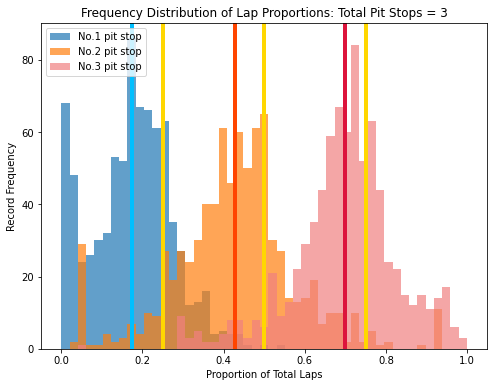

In [22]:
df_dict = fn.pit_stop_group(merge_df)
fn.distribution_plot(df_dict)

## Hypothesis 3

In [23]:
df_front, df_back = fn.front_back_division(merge_df, top_num=5)

----------------------------------------------------------------------------------------
Total Pits: 1, no.1 pit, p value=0.6120208311353951


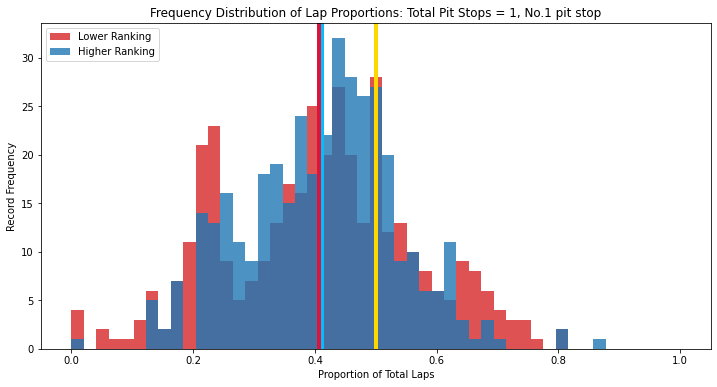

----------------------------------------------------------------------------------------
Total Pits: 2, no.1 pit, p value=0.06260995721012505


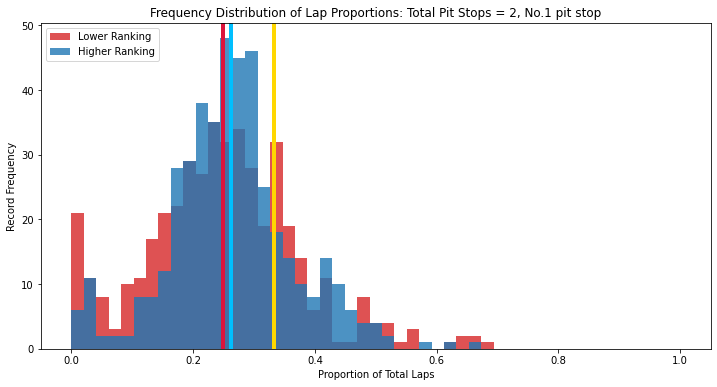

----------------------------------------------------------------------------------------
Total Pits: 2, no.2 pit, p value=0.2175452218698461


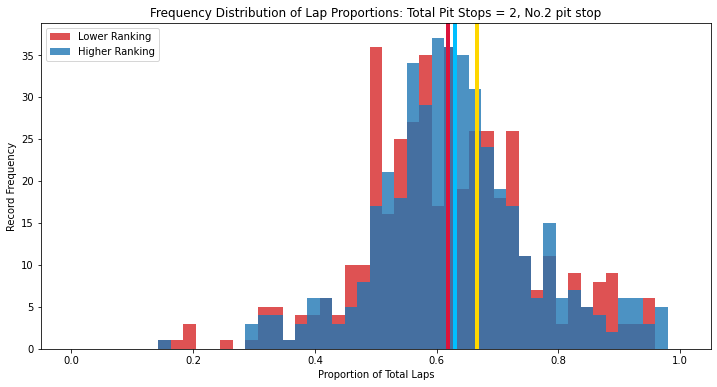

----------------------------------------------------------------------------------------
Total Pits: 3, no.1 pit, p value=0.045088810955493594


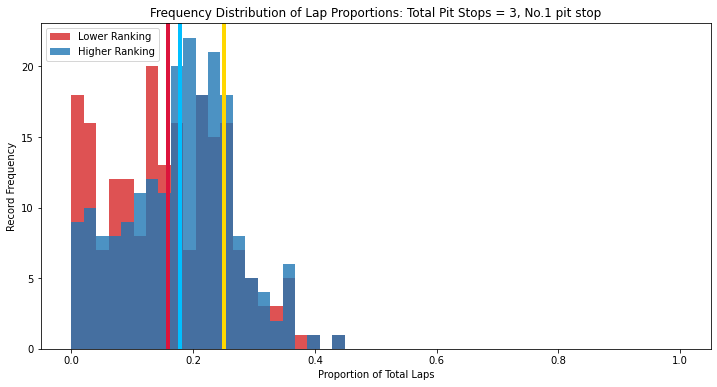

----------------------------------------------------------------------------------------
Total Pits: 3, no.2 pit, p value=0.005040876100088418


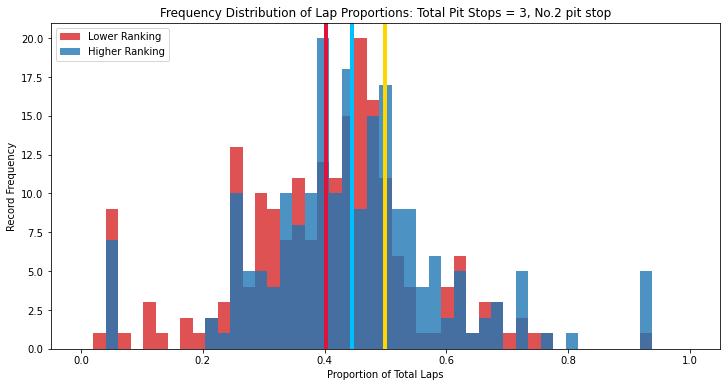

----------------------------------------------------------------------------------------
Total Pits: 3, no.3 pit, p value=0.0004646569255695769


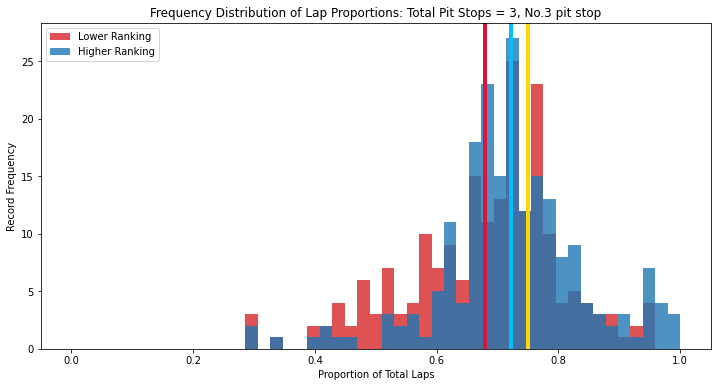

In [24]:
fn.comparison_plot(df_front,df_back)

In [25]:
df_front, df_back = fn.front_back_division(merge_df, select_col='abs_deviation_mean', top_num=5)

----------------------------------------------------------------------------------------
Total Pit Stops = 1
Mann-Whitney U rank test p value=0.0013457077506444308
     Means of Average Deviation - 
        Higher Ranking: 0.122, Lower Ranking: 0.147
Higher ranking records have significantly lower mean deviations


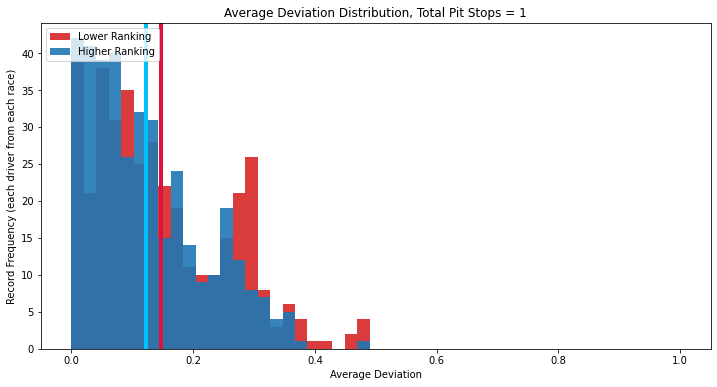

----------------------------------------------------------------------------------------
Total Pit Stops = 2
Mann-Whitney U rank test p value=0.003111210037814851
     Means of Average Deviation - 
        Higher Ranking: 0.103, Lower Ranking: 0.118
Higher ranking records have significantly lower mean deviations


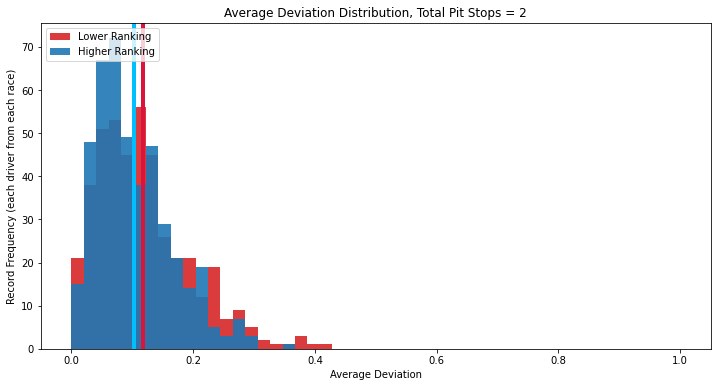

----------------------------------------------------------------------------------------
Total Pit Stops = 3
Mann-Whitney U rank test p value=0.011301101697729535
     Means of Average Deviation - 
        Higher Ranking: 0.101, Lower Ranking: 0.121
Higher ranking records have significantly lower mean deviations


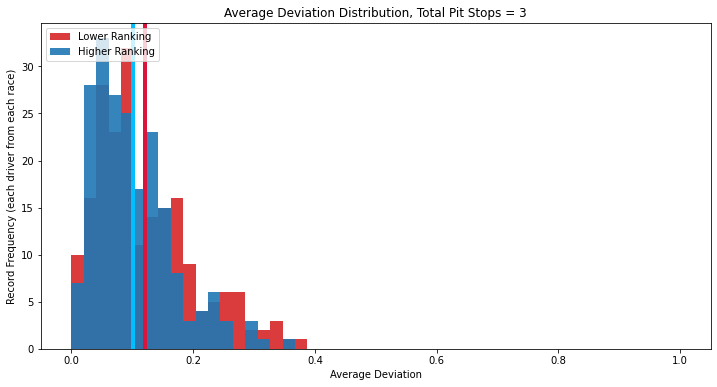

In [26]:
fn.avg_deviation_plot(df_front,df_back)